In [1]:
# Imports
import argparse
import glob
import os
import sys
import re

# Third party imports
import xarray as xr
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import cftime

In [2]:
# Import from dictionaries
import dictionaries as dic

# Import functions
import processing_NAO_data as pnd
import functions_lag as fnc

In [3]:
# Load the observations manually
obs = xr.open_dataset(dic.obs_long, chunks={"time": 50})

In [4]:
# Set up the forecast range and season
forecast_range = "2-9"
season = "DJFM"
variable = "psl"

# Set up the test model
test_model = [ "BCC-CSM2-MR" ]

In [5]:
# Call the function to load the lagged ensemble members
# %tb
base_directory = "/home/users/benhutch/alternate-lag-processed-data"
lagged_ensemble_members = fnc.load_data(base_directory, dic.models, variable, forecast_range, season)

Searching for files in  /home/users/benhutch/alternate-lag-processed-data/*.nc
Files for BCC-CSM2-MR: ['/home/users/benhutch/alternate-lag-processed-data/NAO_BCC-CSM2-MR_psl__DJFM_lag-4_r1i1.init-minus-1.nc', '/home/users/benhutch/alternate-lag-processed-data/NAO_BCC-CSM2-MR_psl__DJFM_lag-4_r1i1.init-minus-2.nc', '/home/users/benhutch/alternate-lag-processed-data/NAO_BCC-CSM2-MR_psl__DJFM_lag-4_r1i1.init-minus-3.nc', '/home/users/benhutch/alternate-lag-processed-data/NAO_BCC-CSM2-MR_psl__DJFM_lag-4_r1i1.same-init.nc', '/home/users/benhutch/alternate-lag-processed-data/NAO_BCC-CSM2-MR_psl__DJFM_lag-4_r2i1.init-minus-1.nc', '/home/users/benhutch/alternate-lag-processed-data/NAO_BCC-CSM2-MR_psl__DJFM_lag-4_r2i1.init-minus-2.nc', '/home/users/benhutch/alternate-lag-processed-data/NAO_BCC-CSM2-MR_psl__DJFM_lag-4_r2i1.init-minus-3.nc', '/home/users/benhutch/alternate-lag-processed-data/NAO_BCC-CSM2-MR_psl__DJFM_lag-4_r2i1.same-init.nc', '/home/users/benhutch/alternate-lag-processed-data/NAO_

In [6]:
# (lagged_ensemble_members["BCC-CSM2-MR"])

In [7]:
# Process the model data
extracted_model_data, model_time = fnc.process_data(lagged_ensemble_members, variable)

Dataset type: <class 'dict'>


In [8]:
# print((lagged_nao))

In [9]:
# # Extract the model data from the combined model data
# extracted_model_data = fnc.extract_model_data(test_model, combined_model_data)

In [10]:
# Process the observations
obs_nao_anom, obs_time = pnd.process_observations(obs)

(56,)
(56,)


In [11]:
obs_nao_anom.values

array([-6.3554754e+00, -9.5273399e+00, -9.0454988e+00, -7.9209752e+00,
       -6.1510725e+00, -3.9323792e+00, -1.8308229e+00, -2.0797155e+00,
       -8.2601625e-01,  1.3739395e-01,  3.4737507e-01, -3.5296369e-01,
       -8.7588125e-01, -1.5944579e+00, -2.1773391e+00, -1.2276349e+00,
       -1.3797085e+00, -6.4968222e-01, -3.4038123e-01,  3.5413346e-01,
        1.4846133e-01,  1.8810407e+00,  3.2510529e+00,  2.5537694e+00,
        2.8302557e+00,  4.7958565e+00,  6.1325402e+00,  8.1794100e+00,
        7.2252769e+00,  5.0482664e+00,  3.6352830e+00,  4.0361080e+00,
        4.1495919e+00,  1.7028153e+00,  3.2773572e-01, -1.2587537e+00,
       -3.2270613e-01, -1.0932827e-03, -4.4648442e-01, -3.2553241e-01,
       -6.0777533e-01,  8.8634384e-01, -1.5123428e+00, -2.0658119e+00,
       -1.0855211e-01, -1.5723979e+00,  1.6705549e-01,  1.4913354e+00,
        1.4322727e+00,  1.8301322e+00,  4.7285671e+00,  5.7731433e+00,
        5.8144898e+00,  6.7102952e+00,  6.2561598e+00,  6.4657485e-01],
     

In [12]:
obs_time

array(['1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971',
       '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype='datetime64[Y]')

model data shape ()
Extracting data for model: BCC-CSM2-MR
Extracting data for model: MPI-ESM1-2-HR
Extracting data for model: CanESM5
Extracting data for model: CMCC-CM2-SR5
Extracting data for model: HadGEM3-GC31-MM
Extracting data for model: EC-Earth3
Extracting data for model: MPI-ESM1-2-LR
Extracting data for model: FGOALS-f3-L
Extracting data for model: MIROC6
Extracting data for model: IPSL-CM6A-LR
Extracting data for model: CESM1-1-CAM5-CMIP5
Extracting data for model: NorCPM1
ensemble members array shape (7104, 22, 1, 1)
For the obs time: <class 'numpy.ndarray'>
For the model time: <class 'numpy.ndarray'>
obs time ['1964' '1965' '1966' '1967' '1968' '1969' '1970' '1971' '1972' '1973'
 '1974' '1975' '1976' '1977' '1978' '1979' '1980' '1981' '1982' '1983'
 '1984' '1985' '1986' '1987' '1988' '1989' '1990' '1991' '1992' '1993'
 '1994' '1995' '1996' '1997' '1998' '1999' '2000' '2001' '2002' '2003'
 '2004' '2005' '2006' '2007' '2008' '2009' '2010' '2011' '2012' '2013'
 '2014' '2015'

ValueError: x and y must have the same length.

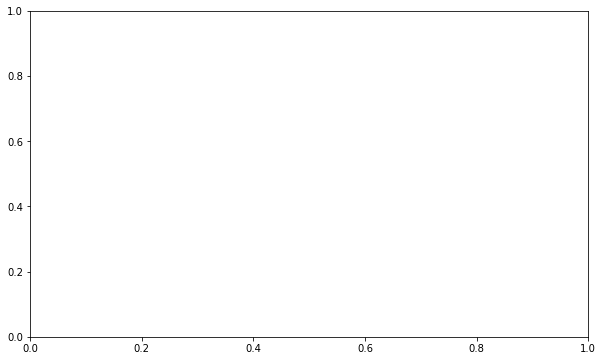

In [13]:
# Call the function to plot the data
pnd.plot_ensemble_members_and_lagged_adjusted_mean(dic.models, extracted_model_data, model_time, obs_nao_anom, obs_time, forecast_range, season)
